*Домашнее задание*
================

*выполнила Вяткина Валерия*

Задание 1 
---------

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from pandas.tools.plotting import scatter_matrix

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('C:/Users/Лера/Downloads/timesData.csv')


***График 1***


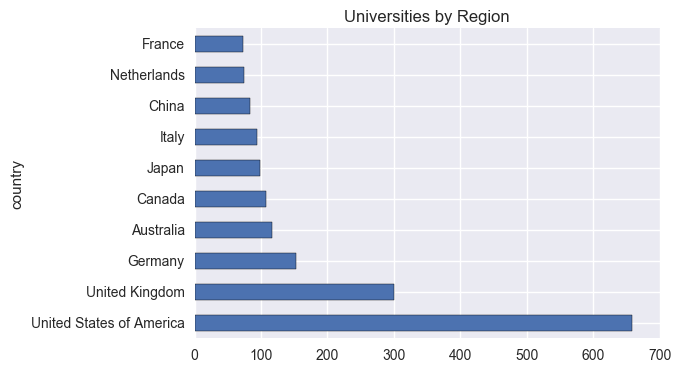

In [12]:
%matplotlib inline
id_count_by_region[:10].plot(kind='barh', rot=0, title='Universities by Region')

*Данная диаграмма демонстрирует количество университетов, представленных в рейтинге, в каждой отдельно взятой стране.*

***Графики 2-4***

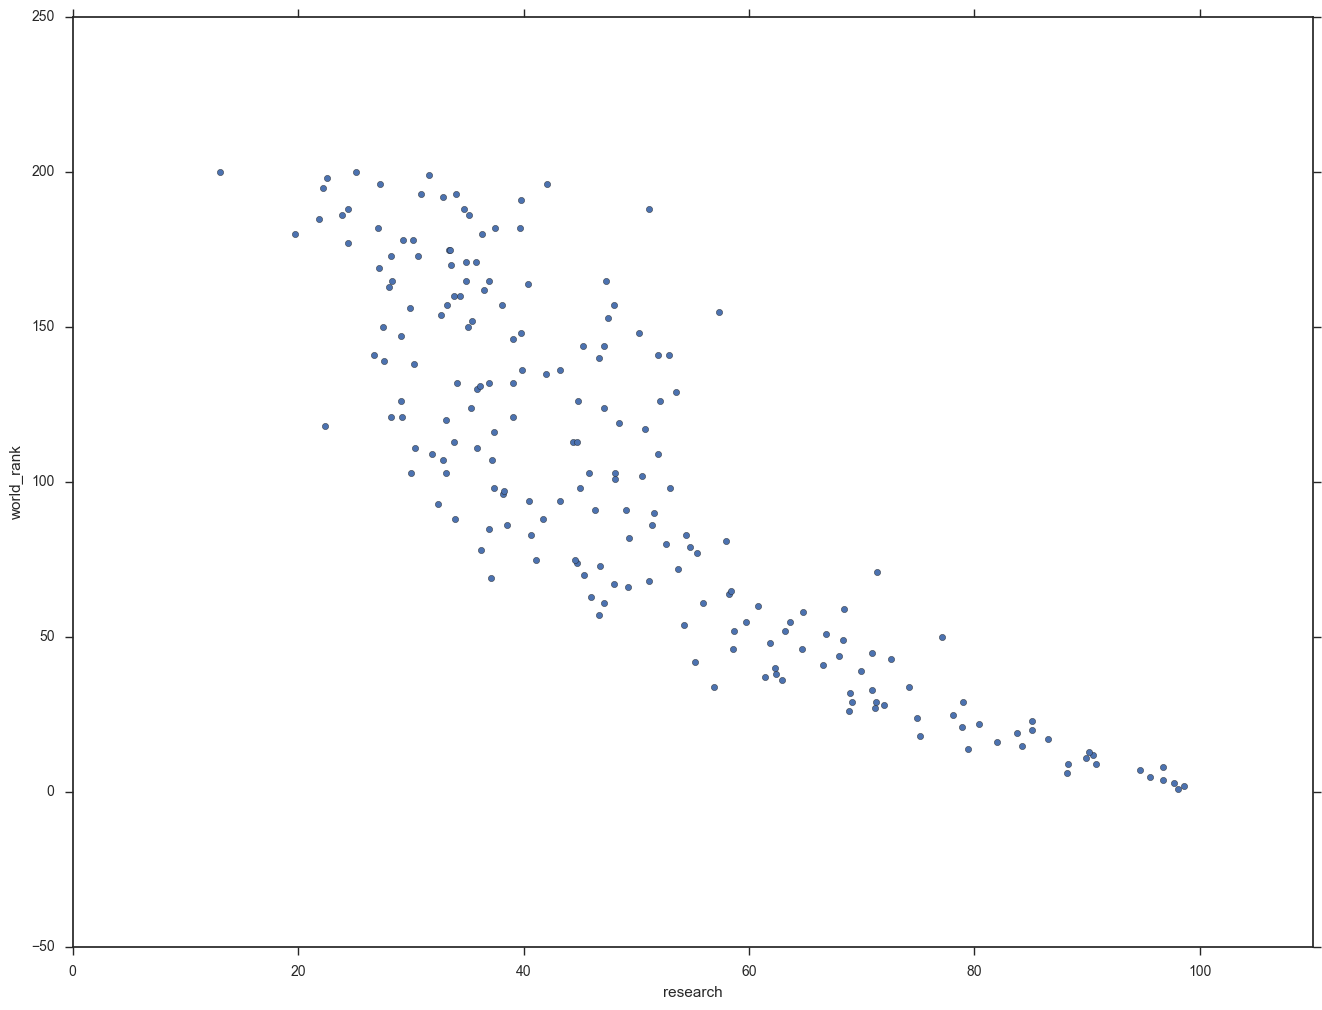

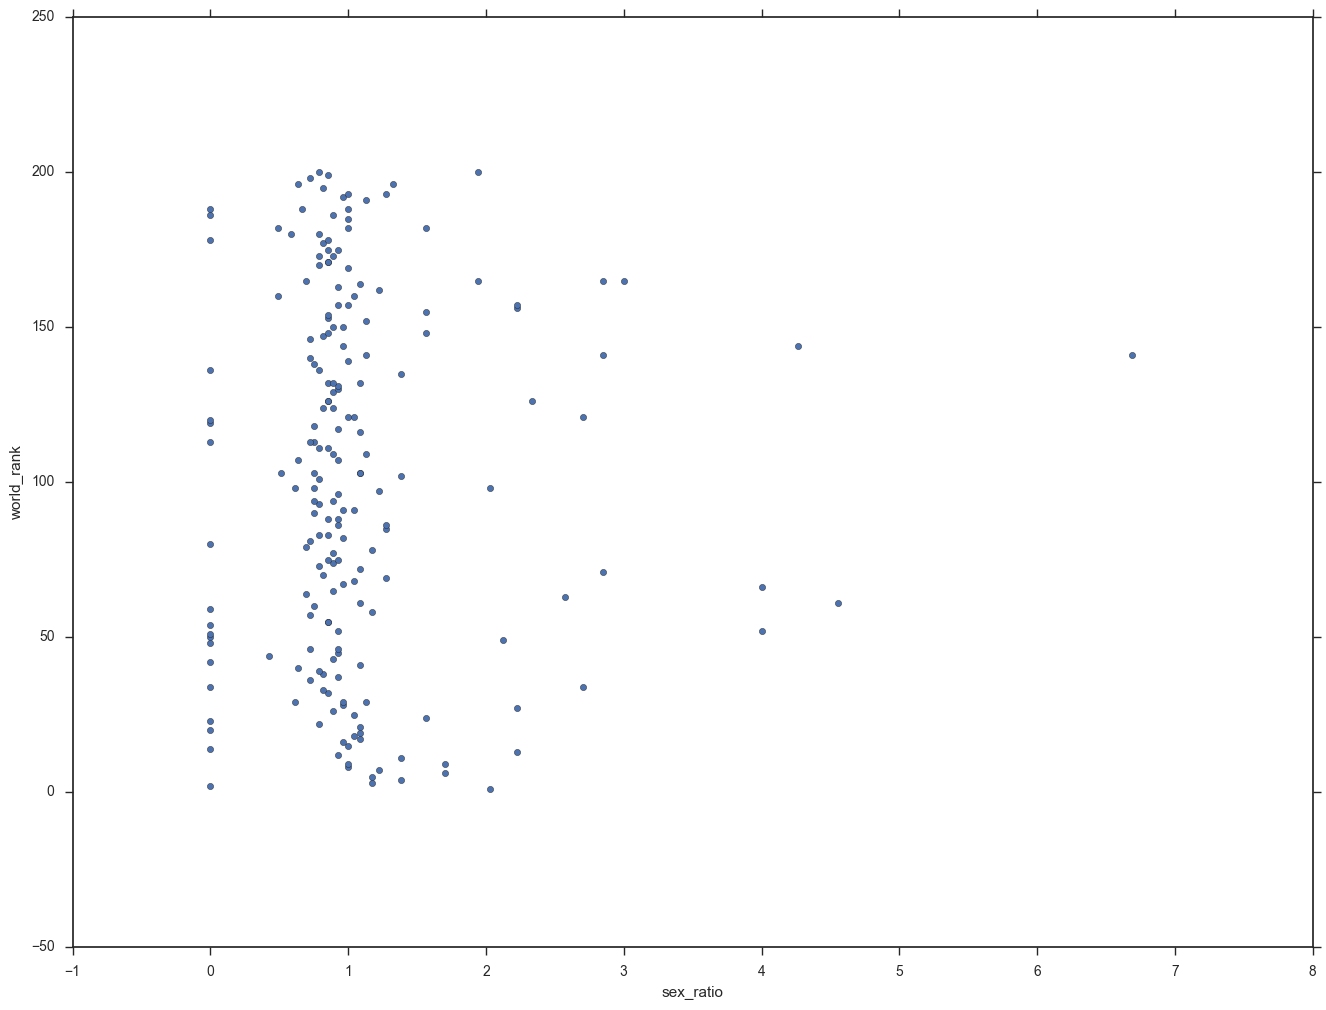

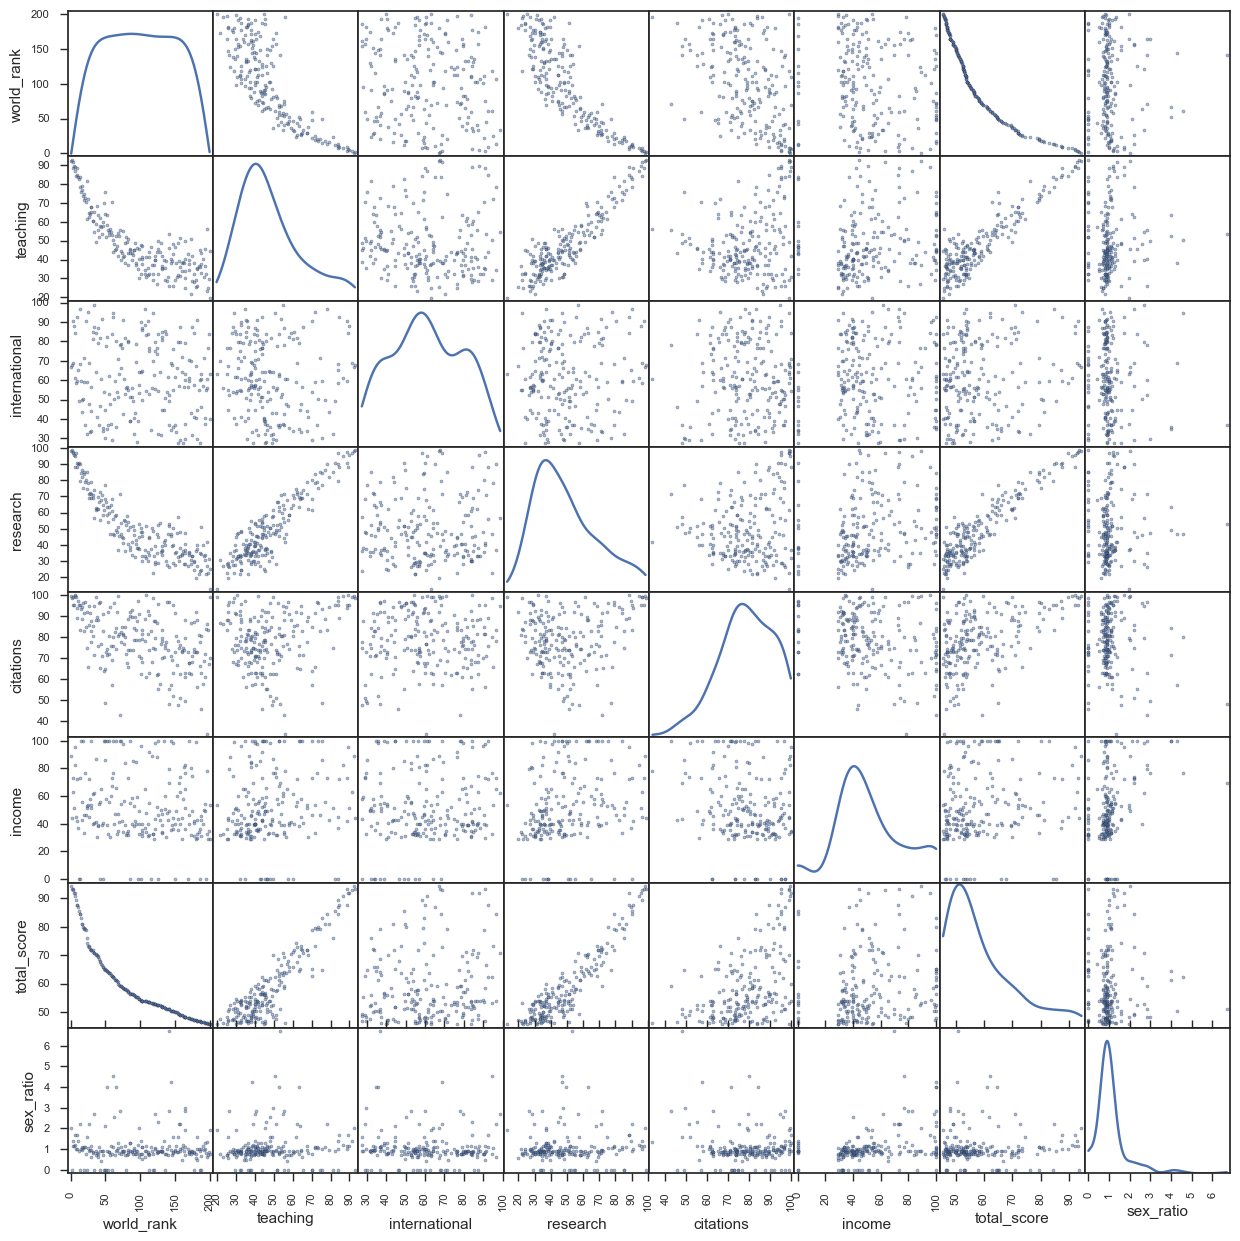

In [50]:
from pandas.tools.plotting import scatter_matrix
def parseFloat(x):
    try:
        x = float(x)
    except:
        x = 0
    return x

def parseStringCommas(x):
    try:
        x = int(x.replace(',',''))
    except:
        x = 0
    return x

def parseStringModulus(x):
    try:
        x = int(x.replace('%',''))
    except:
        x = 0
    return x

def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x

df['female'] = df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
df['male'] = df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
df['sex_ratio'] =  np.where(df['male'] == 0, 0, df['male']/df['female'])
    
columnstoFloat = ['world_rank', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'student_staff_ratio']    

for column in columnstoFloat:
    df[column] = df[column].apply(parseFloat)
    

    
df['num_students'] = df['num_students'].apply(parseStringCommas)
df['year'] = df['year'].apply(lambda x : int(x))
df['international_students'] = df['international_students'].apply(parseStringModulus)
cleanData = df[(df.world_rank != 0) & (df.year == 2015)][['world_rank', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'sex_ratio']]
# Plot for how research varies with world rank
cleanData.plot(y='world_rank', x = 'research', kind='scatter', xlim=(0,110))
cleanData.plot(y='world_rank', x = 'sex_ratio', kind='scatter')
scatter_matrix(cleanData, alpha=0.5, figsize=(15,15), diagonal='kde')
# Multiple Regression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
train, test = train_test_split(cleanData, test_size = 0.3)

*Представлена взаимосвязанность отдельных фаткоров с положением в рейтинге и между собой.*

*P.S. Копипаст во имя вдохновения простителен!*


***График 5***

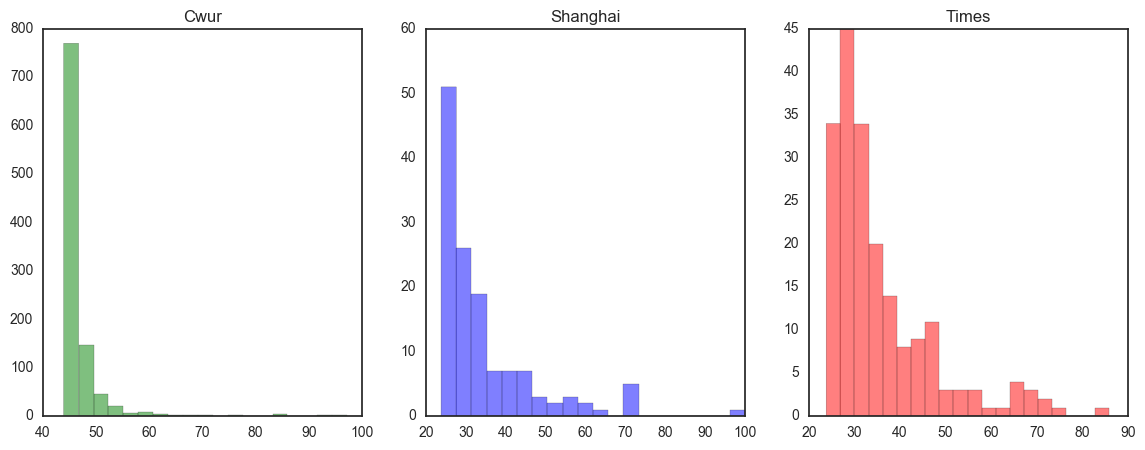

In [44]:
cwur = pd.read_csv('C:/Users/Лера/Downloads/cwurData.csv')
shanghai = pd.read_csv('C:/Users/Лера/Downloads/shanghaiData.csv')
times = pd.read_csv('C:/Users/Лера/Downloads/timesData.csv')

cwur = cwur.rename(columns = {'institution': 'university_name'})
shanghai = shanghai.rename(columns = {'total_score': 'score'})
times = times.rename(columns = {'total_score': 'score'})

cwur = cwur[['university_name', 'score']]
shanghai = shanghai[['university_name', 'score']]
times = times[['university_name', 'score']]

times = times[~(times['score'] == '-')]

cwur.score = pd.to_numeric(cwur.score, errors='coerce')
shanghai.score = pd.to_numeric(shanghai.score, errors='coerce')
times.score = pd.to_numeric(shanghai.score, errors='coerce')

cwur = cwur.groupby('university_name').mean().reset_index()
shanghai = shanghai.groupby('university_name').mean().reset_index()
times = times.groupby('university_name').mean().reset_index()

scores_cwur = [x for x in cwur['score'].values if not np.isnan(x)]
scores_shanghai = [x for x in shanghai['score'].values if not np.isnan(x)]
scores_times = [x for x in times['score'].values if not np.isnan(x)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

num_bins = 20
n, bins, patches = axes[0].hist(scores_cwur, num_bins, 
                                facecolor='green', alpha=0.5)
axes[0].set_title('Cwur')
n, bins, patches = axes[1].hist(scores_shanghai, num_bins,
                                facecolor='blue', alpha=0.5)
axes[1].set_title('Shanghai')
n, bins, patches = axes[2].hist(scores_times, num_bins, 
                                facecolor='red', alpha=0.5)
axes[2].set_title('Times')
plt.show()

*Диаграммы наглядно демонстрируют различия в шкале, которой придерживается каждая рейтинговая система.*

***График 6***

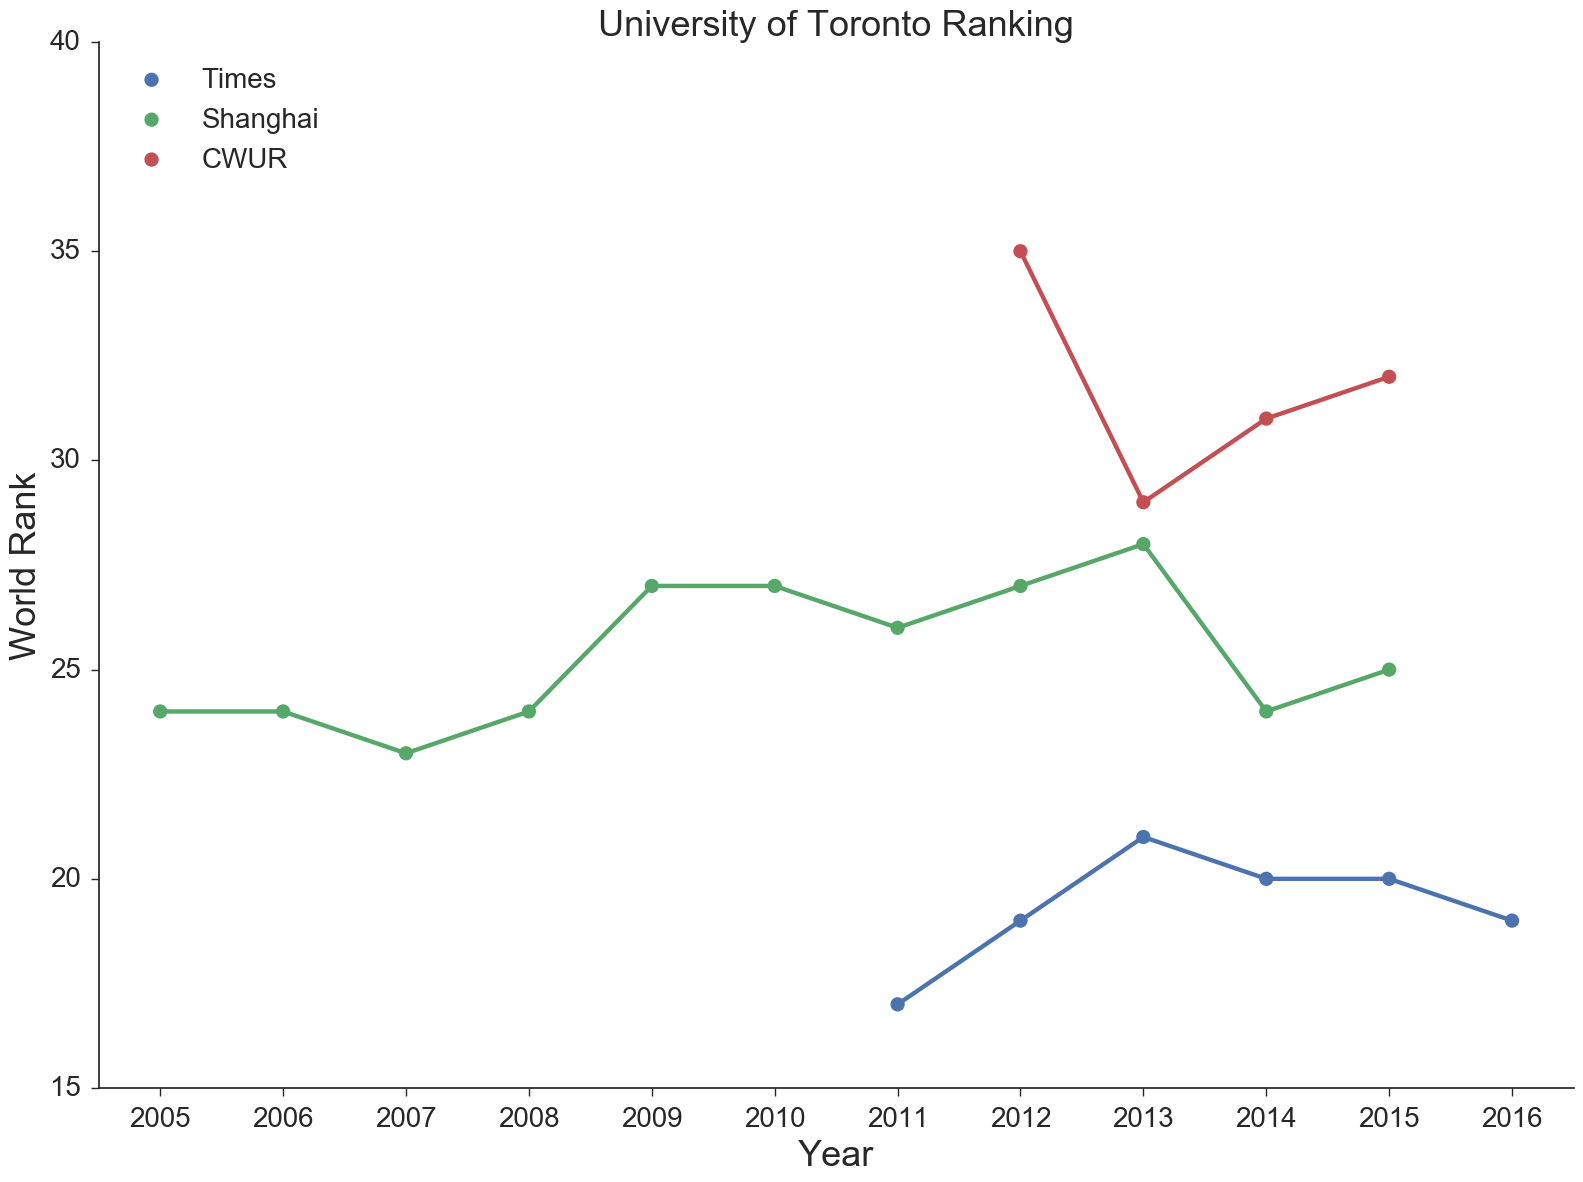

In [105]:
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = 16, 12
my_university_name = ["University of Toronto"]

# Import Data

timesData = pd.read_csv("C:/Users/Лера/Downloads/timesData.csv")
shanghaiData = pd.read_csv("C:/Users/Лера/Downloads/shanghaiData.csv")
cwurData = pd.read_csv("C:/Users/Лера/Downloads/cwurData.csv")





times_plot_data = timesData[timesData.university_name.isin(my_university_name)][['world_rank','year']]
shanghai_plot_data = shanghaiData[shanghaiData.university_name.isin(my_university_name)][['world_rank','year']]
cwur_plot_data = cwurData[cwurData.institution.isin(my_university_name)][['world_rank','year']]

times_plot_data['source'] = 'Times'
shanghai_plot_data['source'] = 'Shanghai'
cwur_plot_data['source'] = 'CWUR'


times_plot_data['world_rank'] = times_plot_data['world_rank'].str.split('-').str[0]
shanghai_plot_data['world_rank'] = shanghai_plot_data['world_rank'].str.split('-').str[0]

plot_data = times_plot_data.append(shanghai_plot_data).append(cwur_plot_data)
plot_data['world_rank'] = plot_data['world_rank'].astype(int)
ax = sns.pointplot(x='year',y='world_rank',hue='source',data=plot_data);



plt.title(my_university_name[0] + " Ranking", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.ylabel("World Rank", fontsize=26)  
plt.xlabel("Year", fontsize=26) 
plt.tight_layout()
plt.legend(loc='upper left',fontsize=20)
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.savefig('university.png')

*Представлено изменение рейтинга Университета Торонто с течением лет.*

***График 7***

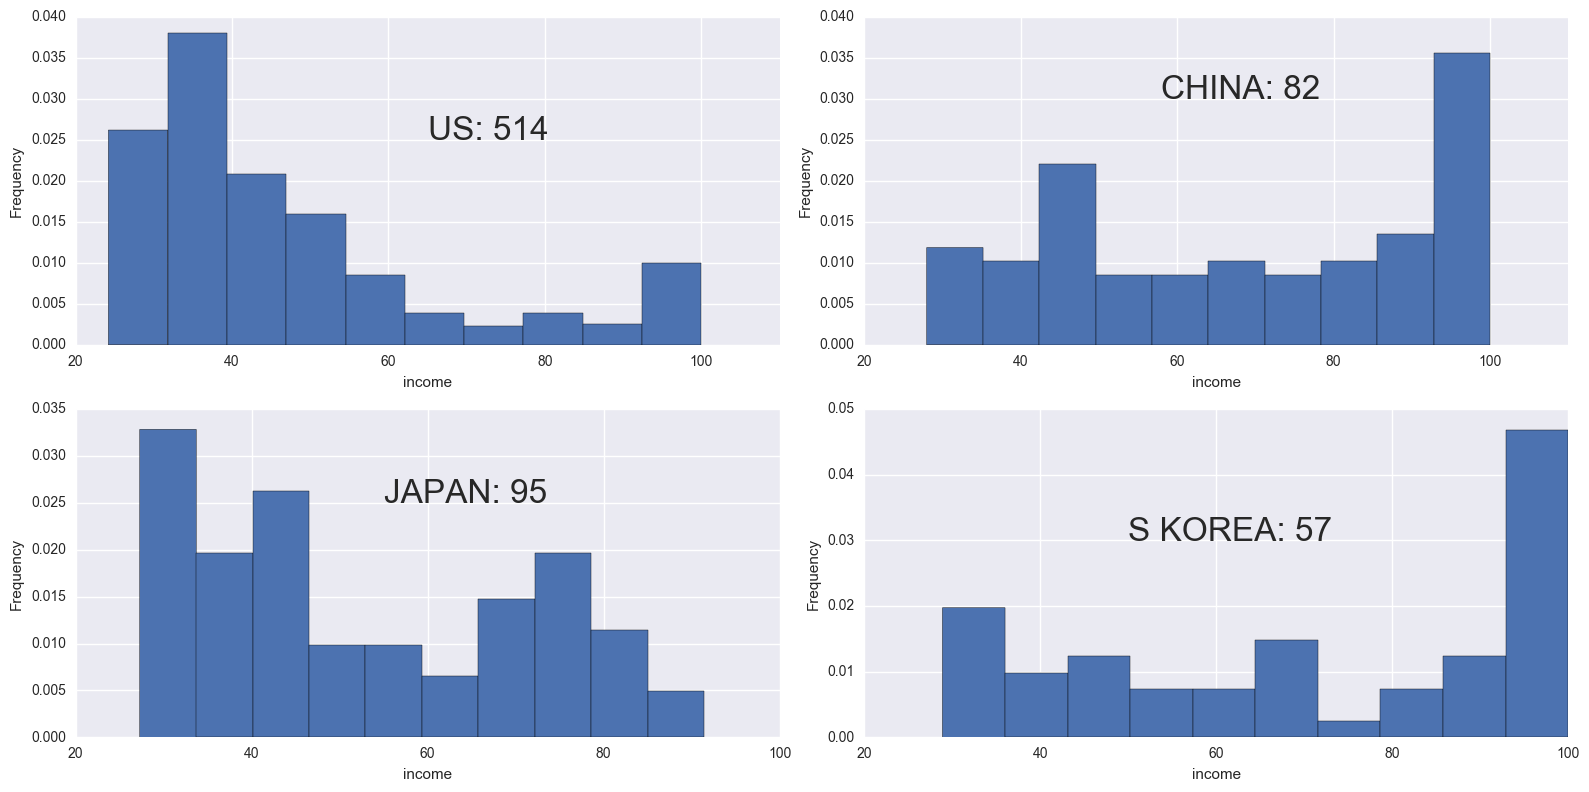

In [13]:
ax=plt.subplot(2,2,1)
USI.plot(kind='hist',normed=True,figsize=(16,8))
num=len(USI)
plt.text(65, 0.025, 'US: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,2)
CNI.plot(kind='hist',normed=True)
num=len(CNI)
plt.text(58, 0.03, 'CHINA: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,3)
JPI.plot(kind='hist',normed=True)
num=len(JPI)
plt.text(55, 0.025, 'JAPAN: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])

ax=plt.subplot(2,2,4)
SKI.plot(kind='hist',normed=True)
num=len(SKI)
plt.text(50, 0.03, 'S KOREA: %s' %num,fontsize=24)
ax.set_xlabel('income')
ax.set_xticks([20,40,60,80,100])
plt.tight_layout()


*Образование в США считается более либеральным и активным по сравнению с азиатским. Мы используем такой показатель как "доход",чтобы измеритьи сравнить уровень образования и его эффективность.*

***График 8***

In [76]:
import requests
import sys
import json
import time

In [82]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode()

In [87]:
data = pd.read_csv('C:/Users/Лера/Downloads/shanghaiData.csv', skiprows=[3897])

top_univers = ['Harvard University',
               'Stanford University',
               'Massachusetts Institute of Technology (MIT)',
               'University of California, Berkeley', 'University of California-Berkeley',
               'University of Cambridge',
               'Princeton University',
               'California Institute of Technology']


layout = go.Layout(
    title = 'World Top Universities Rankings 2005-2015',
    hovermode = 'closest',
    xaxis = dict(
        title = 'year',
    ),
    yaxis = dict(
        title = 'rank',
        autorange='reversed'
    ),
)

iplot(go.Figure(data=data_sc, layout=layout))

*Данный график демонстрирует динамику изменений рейтинга 7 топовых зарубежных вузов на выделенном временном промежутке.*

***График 9***

In [94]:
year = 2015
data_byy = data.groupby('year').get_group(year)
corr = data_byy[['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']].corr()

def plot_corr(x_name, y_name, year):
    data_sc = [go.Scatter(
        x = data_byy[x_name],
        y = data_byy[y_name],
        text = data_byy['university_name'],
        mode = 'markers',
        marker = dict(
            size = 10,
            color = data_byy['total_score'],
            colorscale = 'Rainbow',
            showscale = True,
            colorbar = dict(
                title = 'total score',
            ),
        ),
    )]

    layout = go.Layout(
        title = '%s World University Rankings' % year,
        hovermode = 'closest',
        xaxis = dict(
            title = x_name,
        ),
        yaxis = dict(
            title = y_name,
        ),
        showlegend = False
    )

    iplot(go.Figure(data=data_sc, layout=layout))
    

In [95]:
plot_corr('alumni', 'award', year)


*Представлена зависимость между выпускниками института, получившими Нобелевскую премию, и компетентностью преподавательского состава этого института.*


***График 10***


In [100]:
shanghai = pd.read_csv('C:/Users/Лера/Downloads/shanghaiData.csv')
times = pd.read_csv('C:/Users/Лера/Downloads/timesData.csv')
cwur = pd.read_csv('C:/Users/Лера/Downloads/cwurData.csv')


shanghai['rankings'] = 'shanghai'
times['rankings'] = 'times'

In [99]:
cwur['rankings'] = 'cwur'
dynamics_of_world_rank = cwur.set_index('institution')[['world_rank','year']].pivot(columns='year')['world_rank'].sort_values(2015)

In [101]:
data = dynamics_of_world_rank.iloc[300:600]

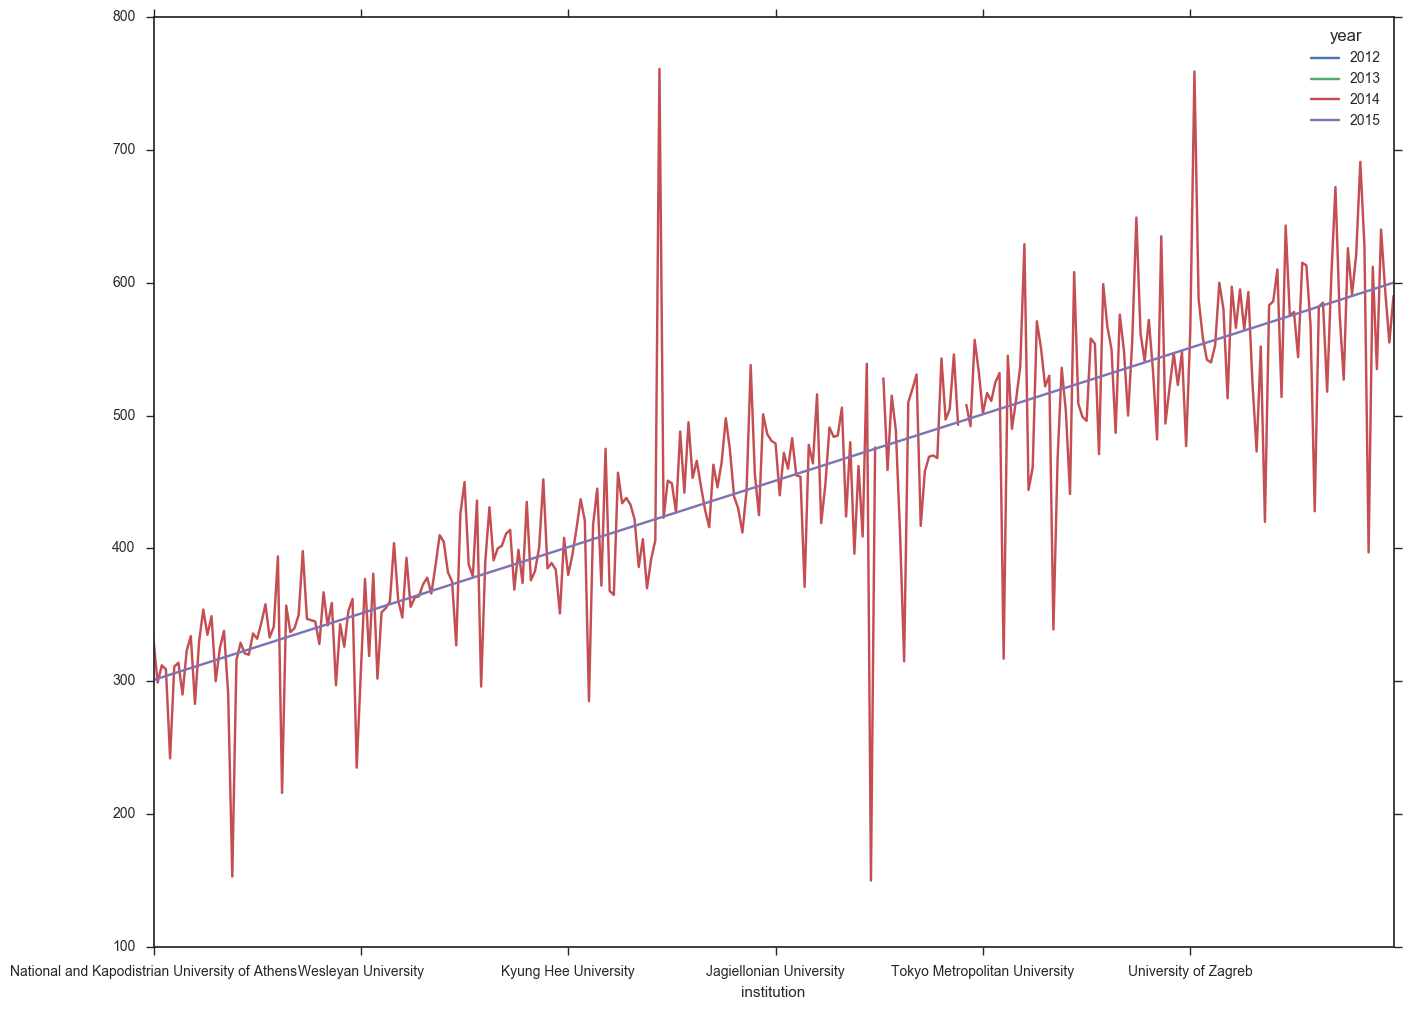

In [102]:
data.plot()

*Представлена динамика изменения рейтинга университетов, проведено соотвествие между отдельными университетами и приписанными им значениями.*

Задание 2
---------
Первый пункт
------------

In [10]:
from scipy import stats 
from scipy.stats import randint

In [22]:
X=stats.uniform(0,1)

In [52]:
values=X.rvs(1000000)

C:\Users\Лера\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


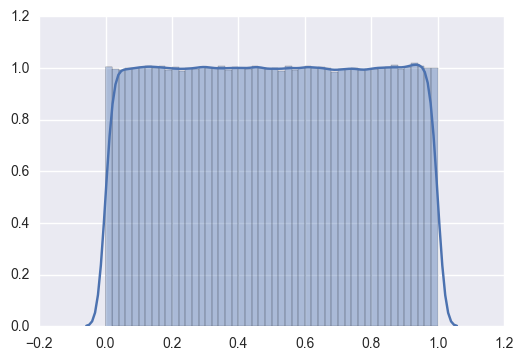

In [53]:
sns.distplot(values)

*Выше представлена гистограмма равномерного распределения.*

C:\Users\Лера\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


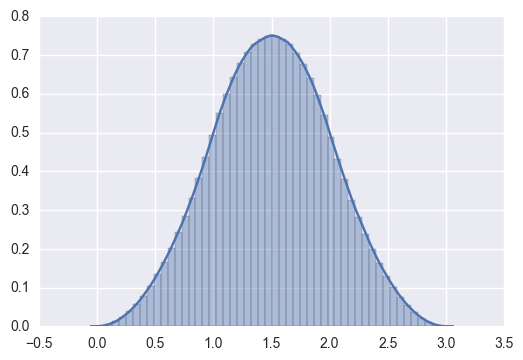

In [54]:
X1 = stats.uniform(0,1)
v1 = X1.rvs(10000000)
X2 = stats.uniform(0,1)
v2 = X2.rvs(10000000)
X3 = stats.uniform(0,1)
v3 = X3.rvs(10000000)
Value = v1 + v2 + v3
sns.distplot(Value)

*Выше представлена гистограмма распределения суммы случайных величин X1+X2+X3*


C:\Users\Лера\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


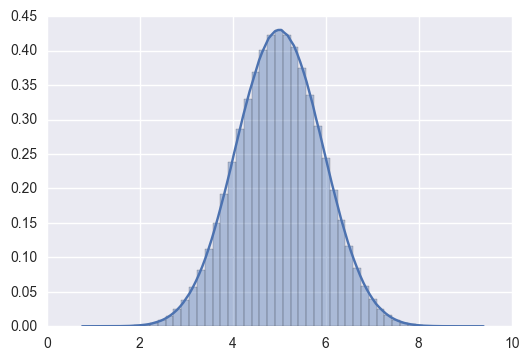

In [57]:
sum10 = 0
for i in range (1, 11):
    X = stats.uniform(0,1)
    Values = X.rvs(10000000)
    sum10 += Values
sns.distplot(sum10)

*Выше представлена гистограмма распределения для суммы случайных величин: $\Sigma^{10}_{i=1} X_{i}$ *

Аналогично поступим для $\Sigma^{50}_{i=1} X_i$

C:\Users\Лера\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


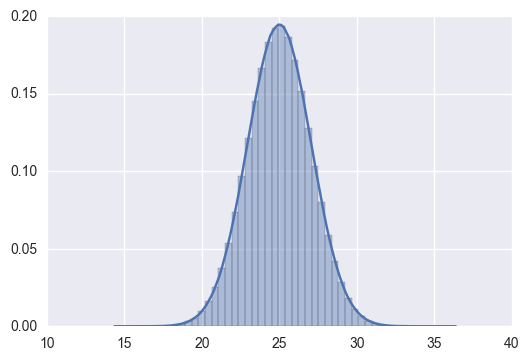

In [58]:
sum50 = 0
for i in range (1, 51):
    X = stats.uniform(0,1)
    Values = X.rvs(10000000)
    sum50 += Values
sns.distplot(sum50)